# Water Quality and Potability Classification
  
#### [Dataset URL](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability)
  
## Dataset description

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption. The main objective of this dataset is to assess and predict water potability based on water quality attributes. It can be used for evaluating the safety and suitability of water sources for human consumption, making informed decisions about water treatment, and ensuring compliance with water quality standards.

## Features

- pH: The pH level of the water.
- Hardness: Water hardness, a measure of mineral content.
- Solids: Total dissolved solids in the water.
- Chloramines: Chloramines concentration in the water.
- Sulfate: Sulfate concentration in the water.
- Conductivity: Electrical conductivity of the water.
- Organic_carbon: Organic carbon content in the water.
- Trihalomethanes: Trihalomethanes concentration in the water.
- Turbidity: Turbidity level, a measure of water clarity.
- Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

## Dataset params

- Number of records: 3276
- Number of features: 9
- Missing data: Yes (pH, Sulfate and Trihalomethanes columns)
- ML problem type: Classification (Potability - No (0), Yes (1))

## Class distribution

| Class | Amount of records | Percentage |
|-------|-------------------|------------|
| 0     | 1998              | 60.99%     |
| 1     | 1278              | 39.01%     |

## Importing dataset and necessary libraries

In [406]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#df = pd.read_csv("dataset/water_potability.csv")
df = pd.read_csv(r"C:\Users\Krzysztof\Desktop\Studia\MOW 2\water_potability.csv")

## Counting missing values

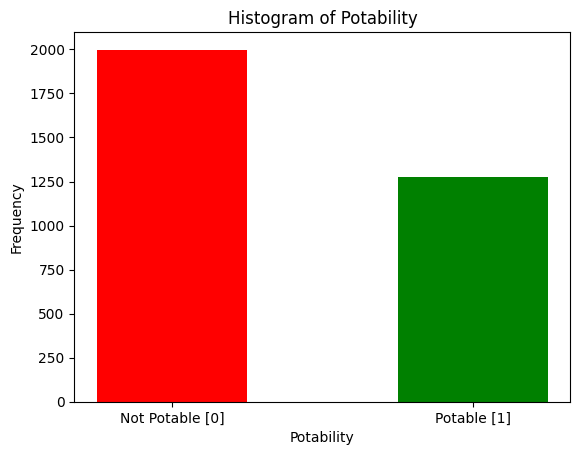

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [407]:
missingData = df.isnull().sum()

_, _, patches = plt.hist(df["Potability"], bins=[0, 0.5, 1], rwidth=0.5)
plt.xlabel("Potability")
plt.ylabel("Frequency")
plt.title("Histogram of Potability")
plt.xticks([0.25, 0.75], ["Not Potable [0]", "Potable [1]"])
patches[0].set_facecolor("red")
patches[1].set_facecolor("green")

plt.show()

print(missingData)

In [408]:
# Analiza danych odstających - Tukey Fences 

def detect_outliers(data: pd.DataFrame):
    outliers = pd.DataFrame()
    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 -q1
        lower_fence = q1 - 2.5 * iqr
        upper_fence = q1 + 2.5 * iqr
        outliers[column] = data[(data[column] < lower_fence) | (data[column] > upper_fence)][column]
    return outliers

In [409]:
# Metoda 1. Wypełnienie danych brakujących zerami.
def fill_with_0(data: pd.DataFrame) -> pd.DataFrame:
    data.fillna(0, inplace=True)
    return data

# Metoda 2. Wypełnianie danych średnią
def fill_with_mean(data: pd.DataFrame) -> pd.DataFrame:
    mean = data.mean()
    data.fillna(mean, inplace=True)
    return data

# Metoda 3. Wypełnienie NaN interpolacją między kolejnymi wierszami danych
def interpolate(data: pd.DataFrame) -> pd.DataFrame:
    ret = data.interpolate(method ='linear', limit_direction ='forward')
    mean = ret.mean()
    ret.fillna(mean, inplace=True)
    return ret

In [410]:
df_0 = fill_with_0(df.copy())
df_mean = fill_with_mean(df.copy())
df_intepolate = interpolate(df.copy())

In [411]:
outliers_interpolate = detect_outliers(df_intepolate)
print(outliers_interpolate.head())

            ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
9    11.180284       NaN     NaN          NaN      NaN           NaN   
128  11.180695       NaN     NaN          NaN      NaN           NaN   
204  11.267828       NaN     NaN          NaN      NaN           NaN   
263  13.175402    47.432     NaN          NaN      NaN           NaN   
317  11.301794       NaN     NaN          NaN      NaN           NaN   

     Organic_carbon  Trihalomethanes  Turbidity  Potability  
9               NaN              NaN        NaN         NaN  
128             NaN       110.739299        NaN         NaN  
204             NaN              NaN        NaN         NaN  
263             NaN              NaN        NaN         NaN  
317             NaN              NaN        NaN         NaN  


## Histograms

In [412]:
def draw_histogram(data: pd.DataFrame):
    columnsToPlot = data.columns[data.columns != "Potability"]

    colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "cyan"]

    numColumns = 3
    numRows = 3

    fig, axes = plt.subplots(numRows, numColumns, figsize=(15, 5 * numRows))
    fig.suptitle("Histograms of Features", fontsize=16)

    for i, column in enumerate(columnsToPlot):
        ax = axes[i // numColumns, i % numColumns]
        ax.hist(data[column], color=colors[i])
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
        ax.grid(alpha = 0.5)


    plt.tight_layout()
    plt.show()

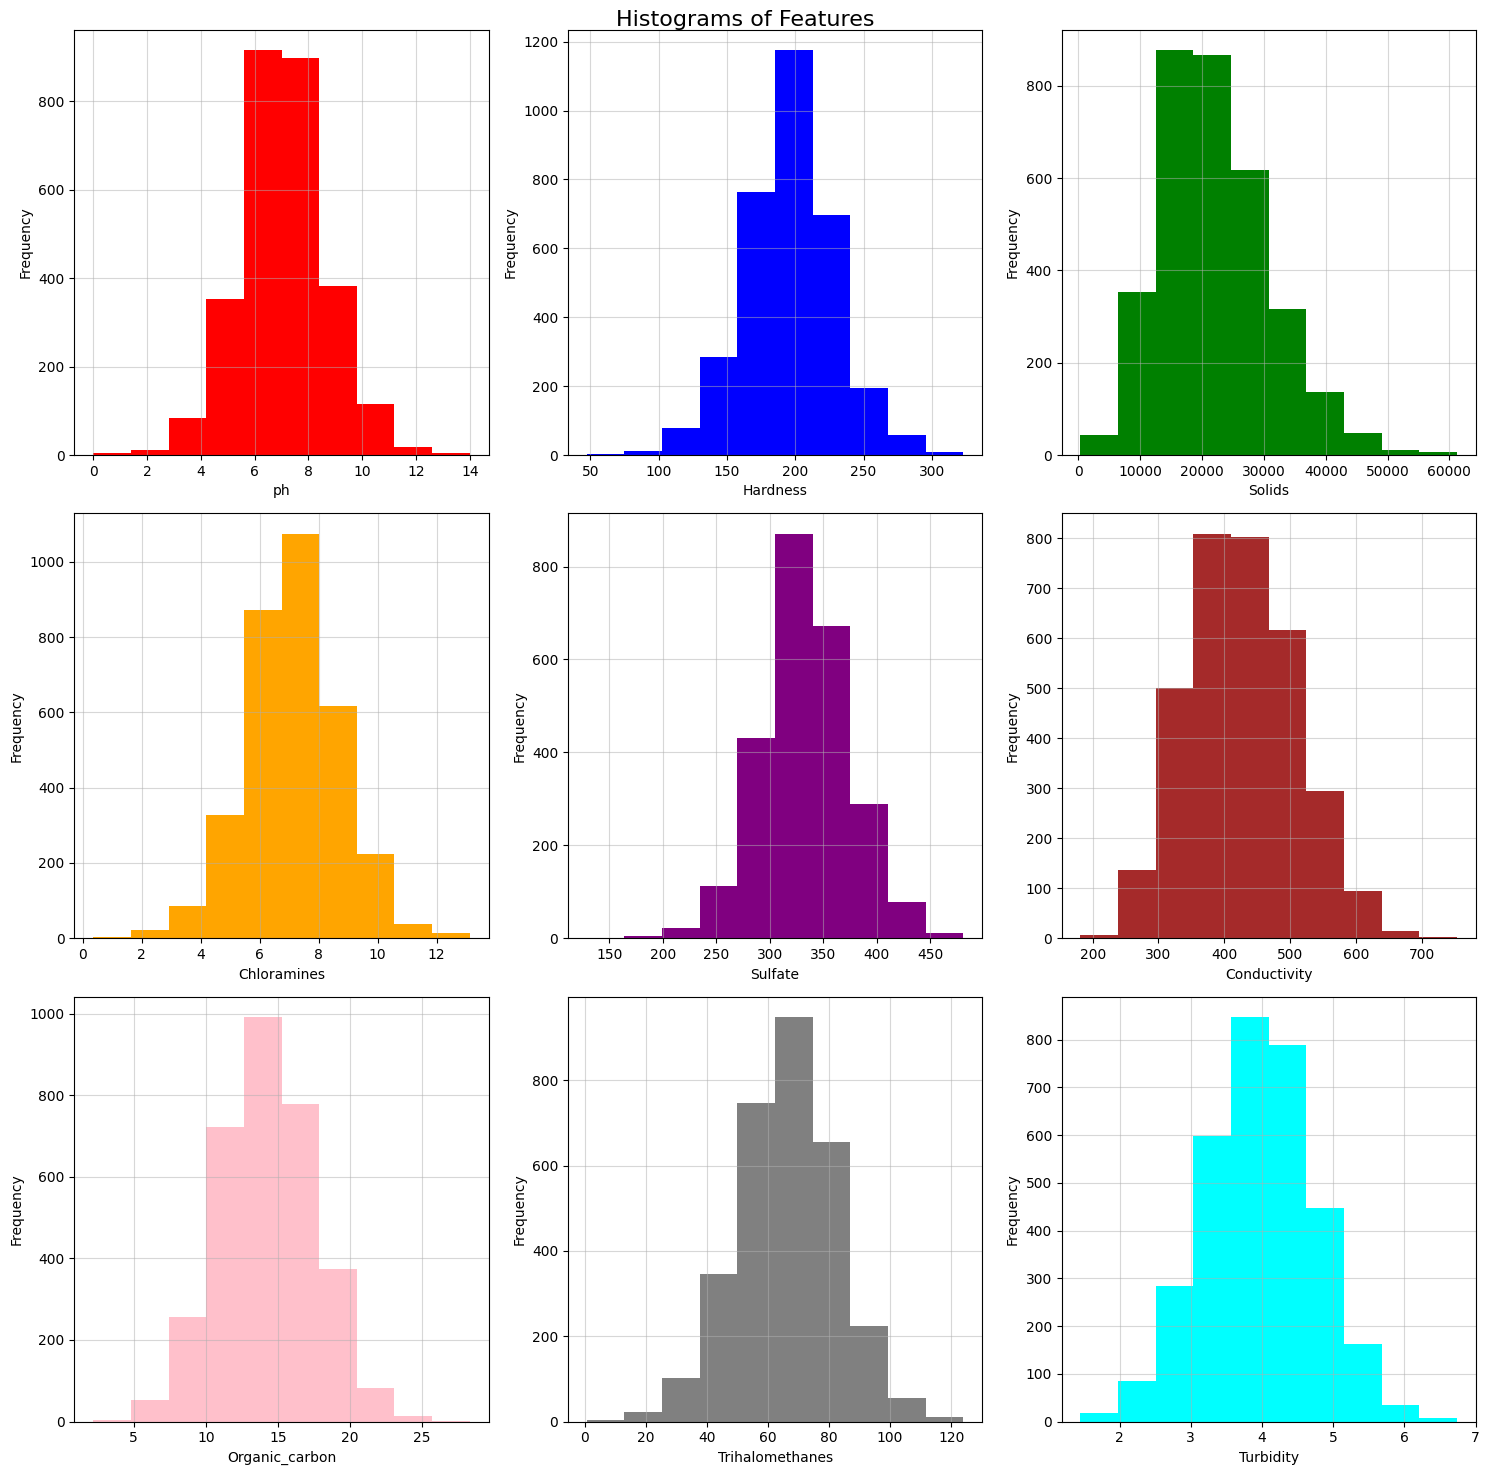

In [413]:
draw_histogram(df)

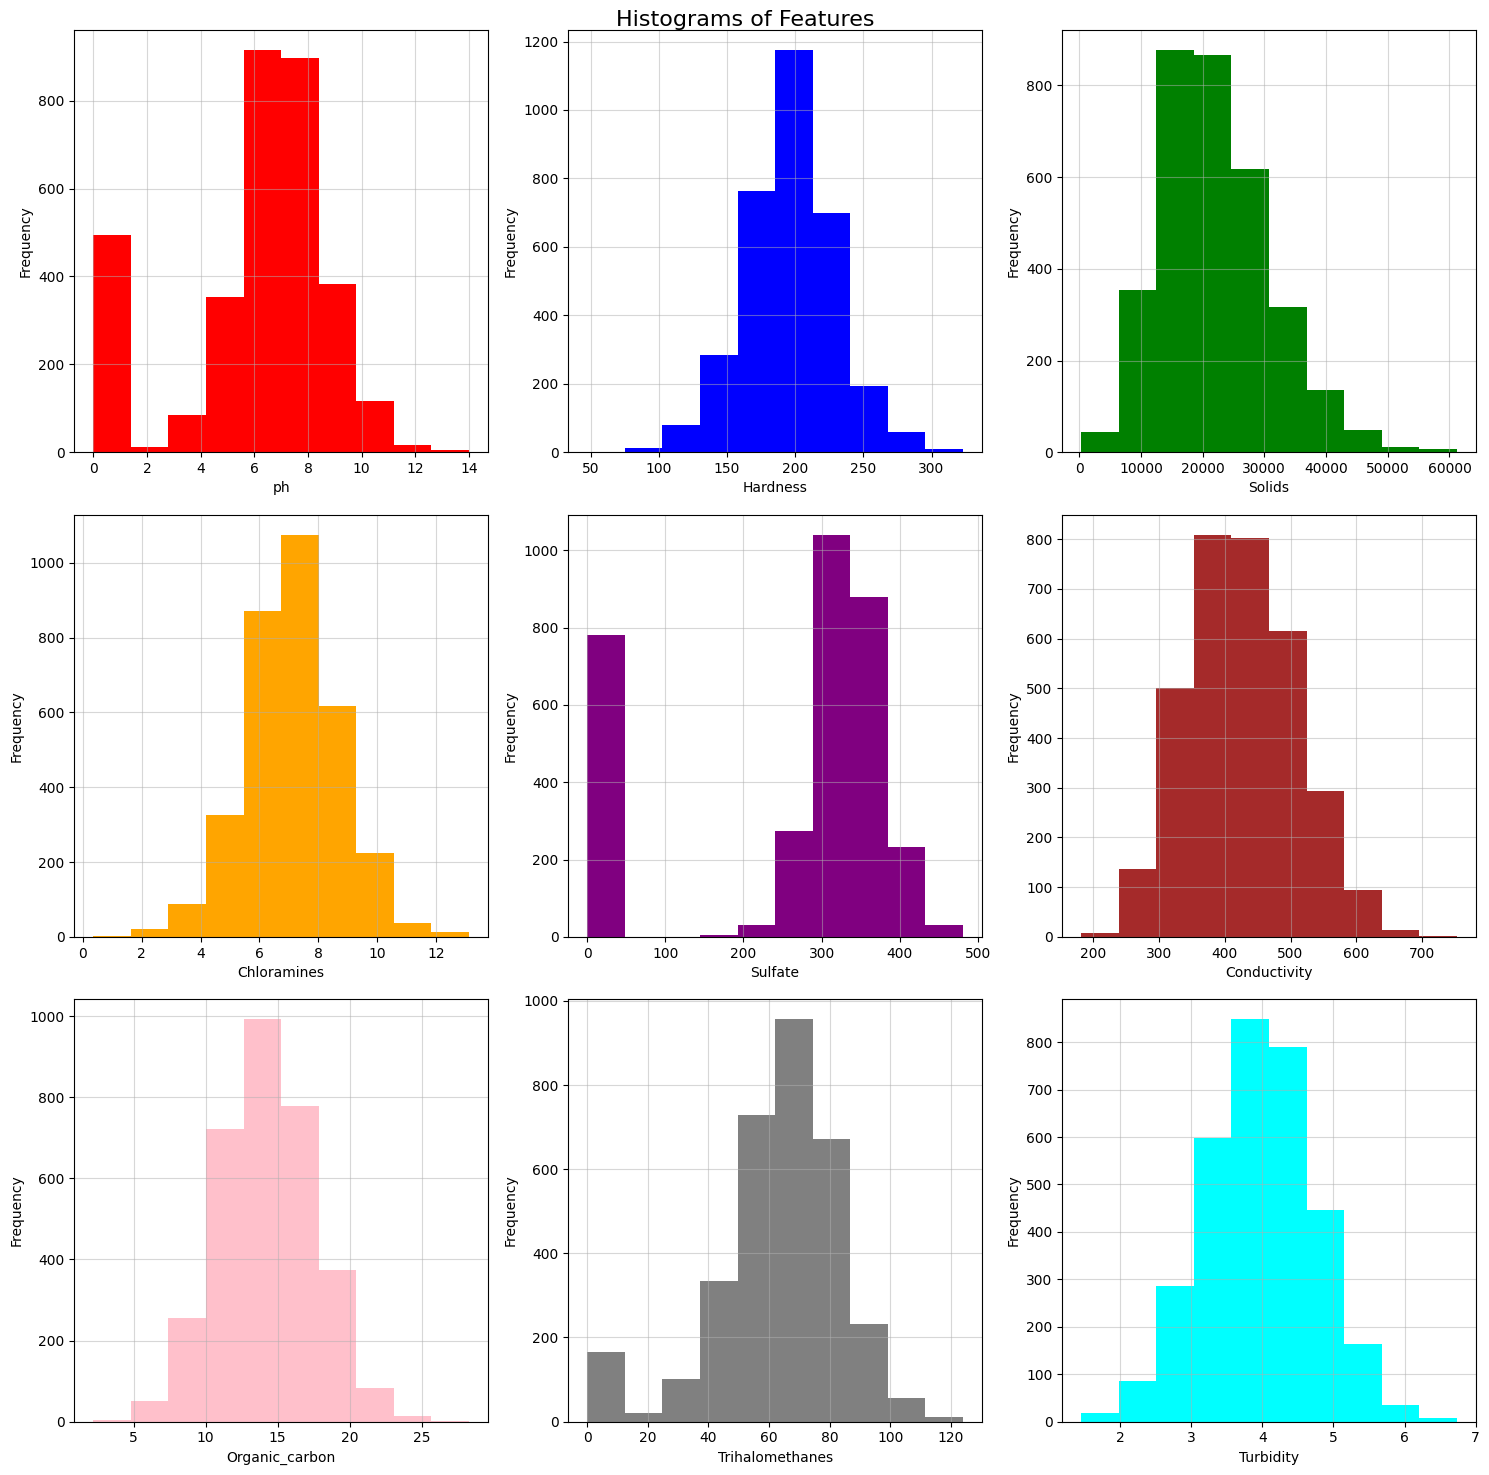

In [414]:
draw_histogram(df_0)

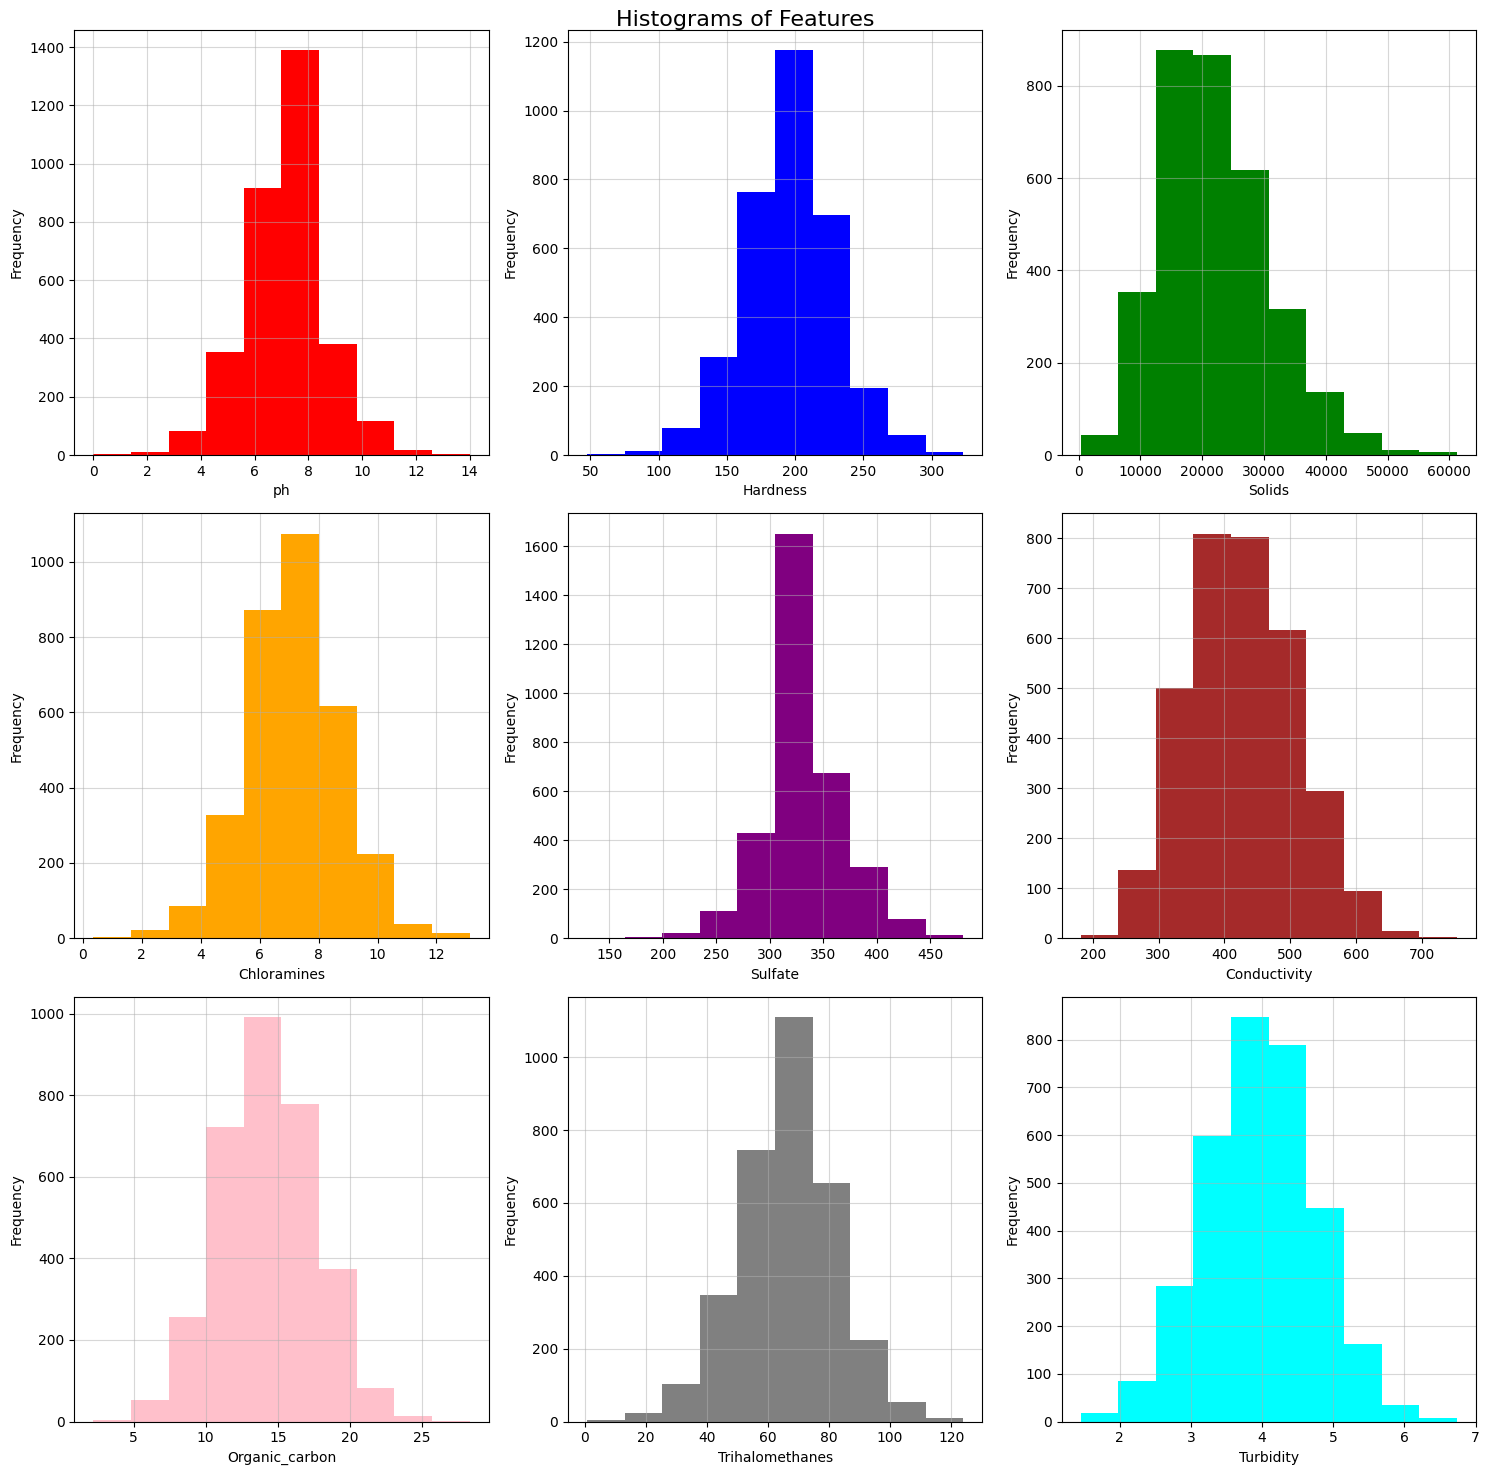

In [415]:
draw_histogram(df_mean)

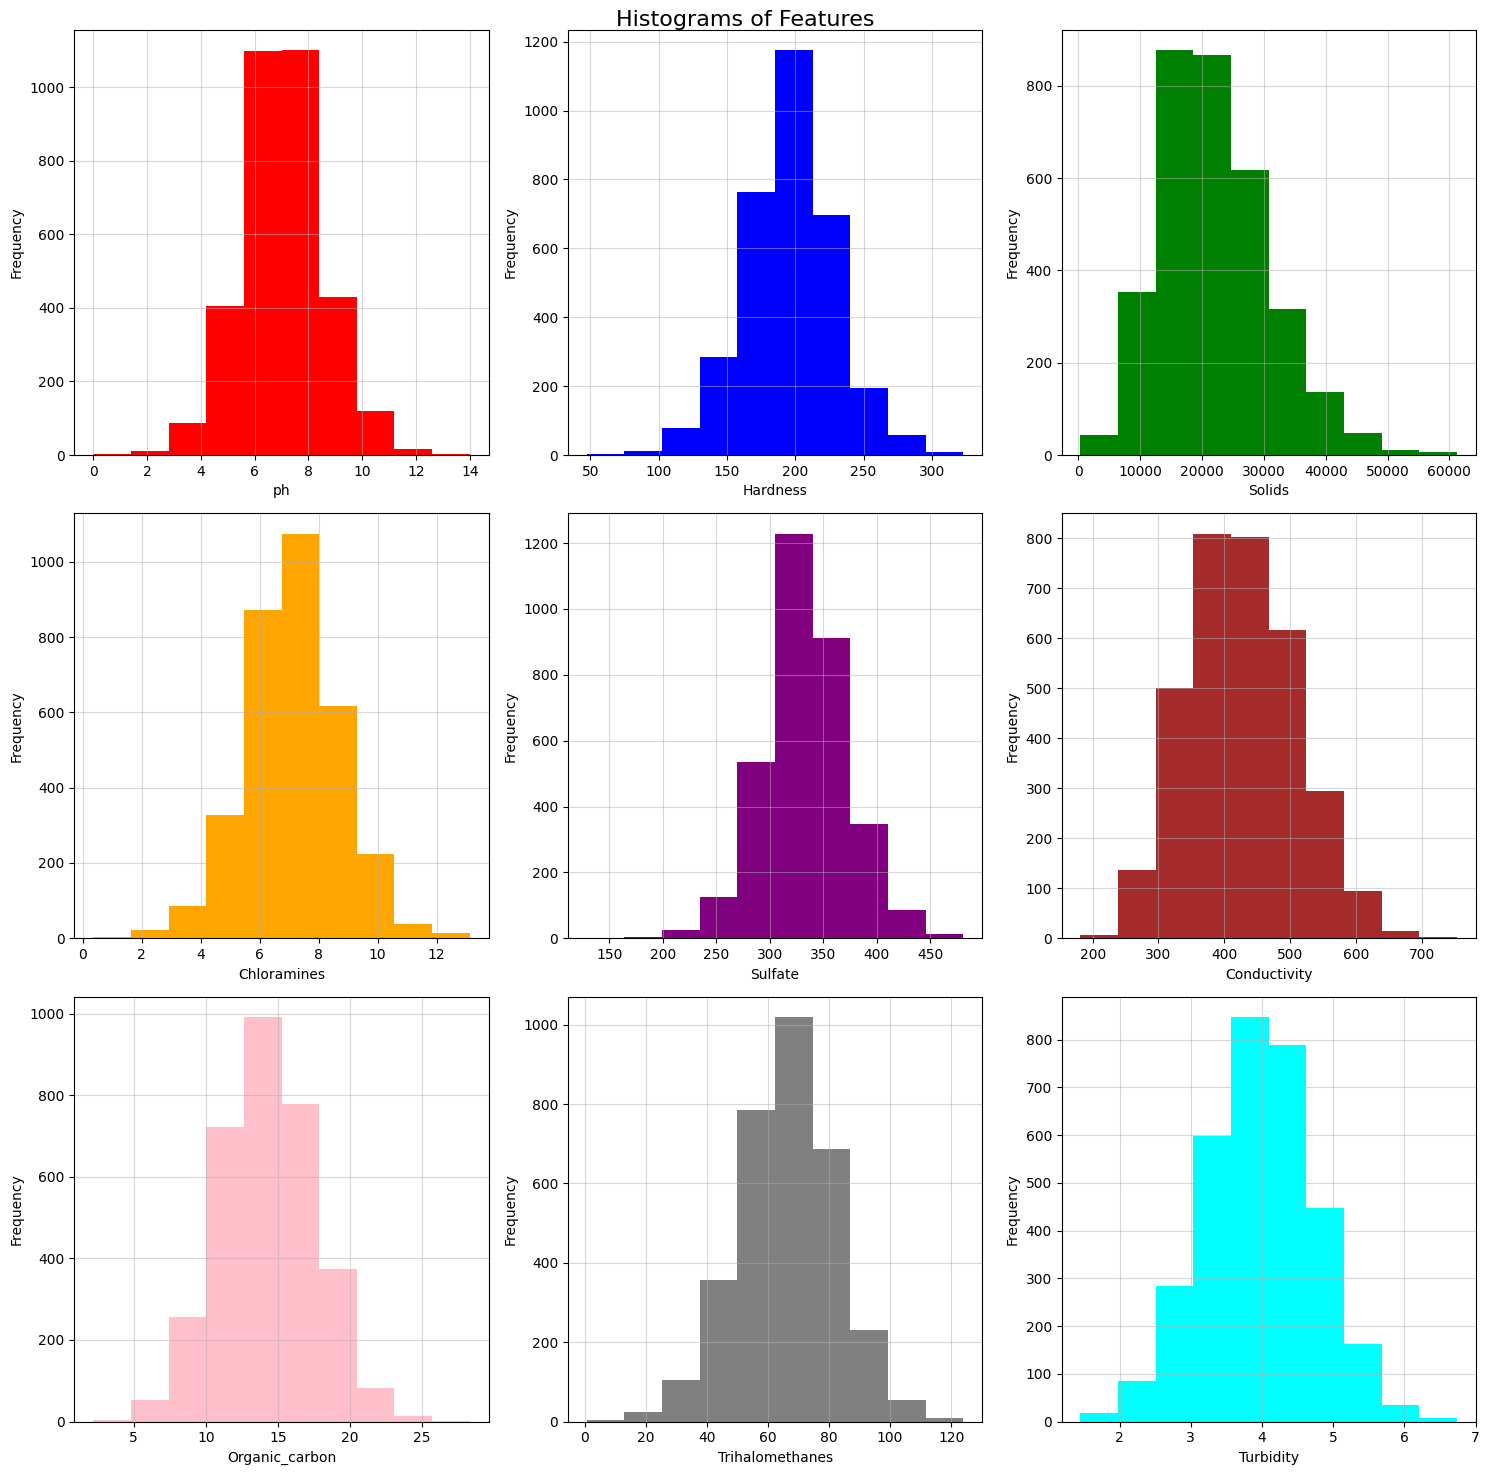

In [416]:
draw_histogram(df_intepolate)

## Box plots

In [417]:
def draw_boxplot(data: pd.DataFrame):
    plt.figure(figsize=(12, 6))
    plt.title("Box plots of Features")

    columnsToPlot = data.columns[data.columns != "Potability"]

    colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "cyan"]

    bp = plt.boxplot([data[column] for column in columnsToPlot], patch_artist=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.xticks(range(1, len(columnsToPlot) + 1), columnsToPlot)

    plt.xlabel('Feature')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

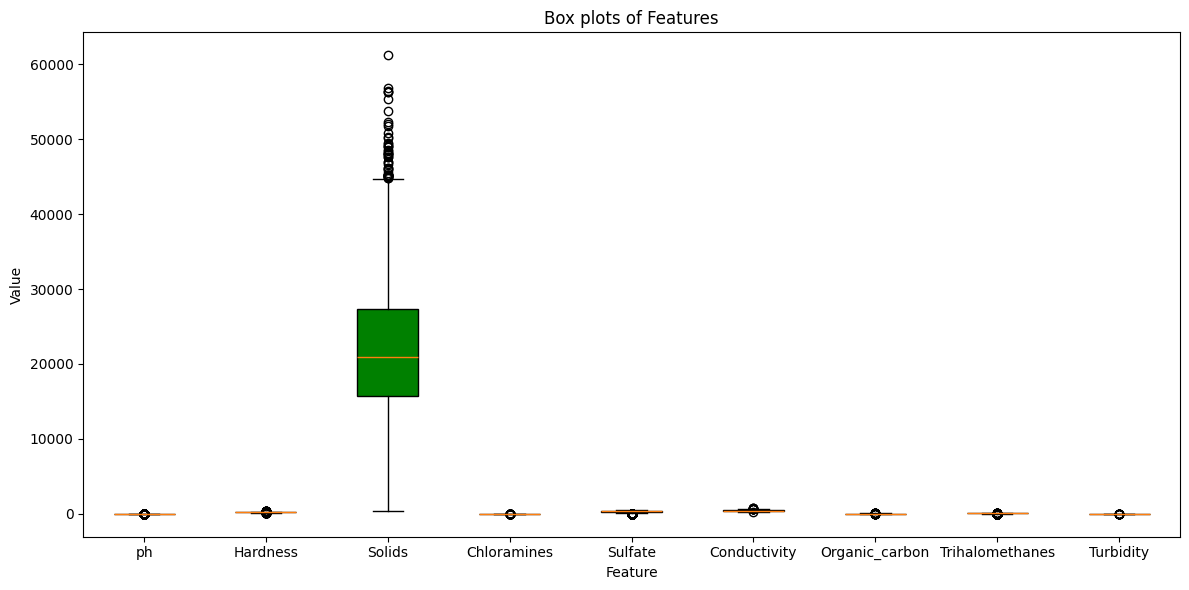

In [418]:
draw_boxplot(df_0)

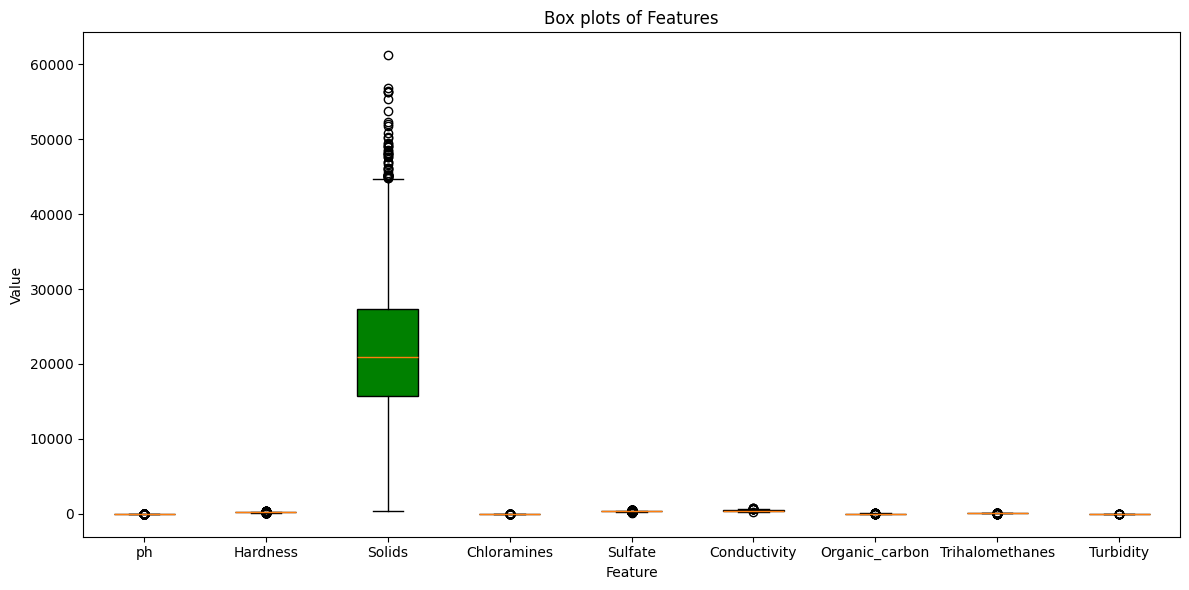

In [419]:
draw_boxplot(df_mean)

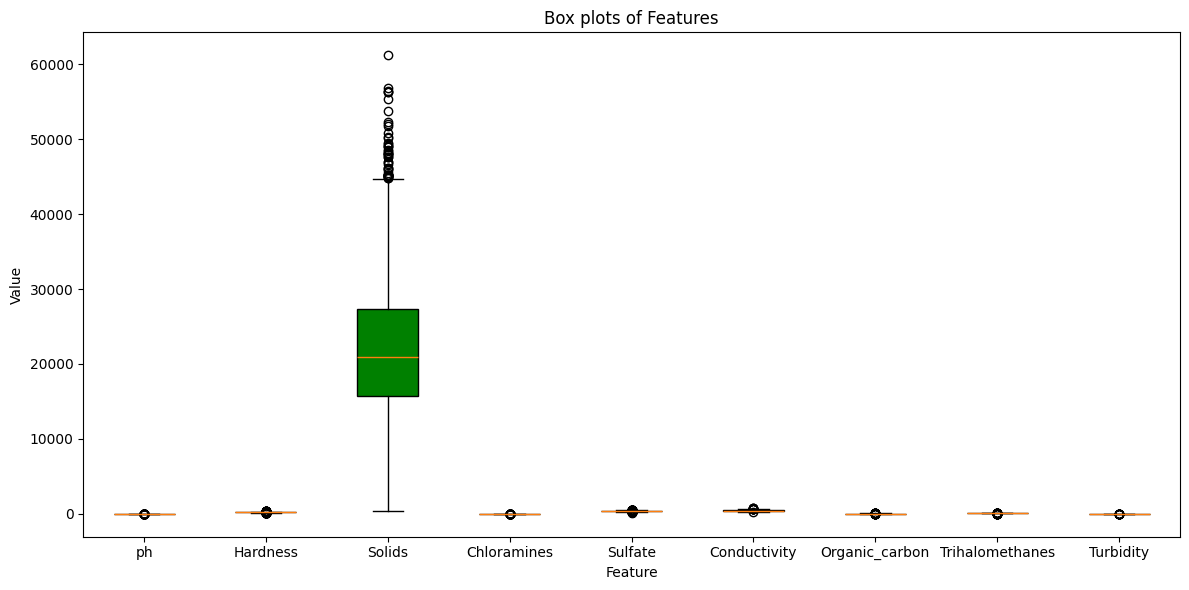

In [420]:
draw_boxplot(df_intepolate)

Normalizacja

In [421]:
from sklearn.preprocessing import StandardScaler

def normalize(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, StandardScaler]:
    scaler = StandardScaler()

    y_values = data['Potability'].values
    x1_values = data['ph'].values
    x2_values = data['Hardness'].values
    x3_values = data['Solids'].values
    x4_values = data['Chloramines'].values
    x5_values = data['Sulfate'].values
    x6_values = data['Conductivity'].values
    x7_values = data['Organic_carbon'].values
    x8_values = data['Trihalomethanes'].values
    x9_values = data['Turbidity'].values
    x_values = np.column_stack((x1_values, x2_values, x3_values, x4_values, x5_values, x6_values, x7_values, x8_values, x9_values))
    x_values_scaled = pd.DataFrame(scaler.fit_transform(x_values))
    return x_values_scaled, y_values, scaler


In [422]:
#Normalization
x_0, y_0, scaler_0 = normalize(df_0)
x_mean, y_mean, scaler_mean = normalize(df_mean)
x_interpolate, y_interpolate, scaler_interpolate = normalize(df_intepolate)

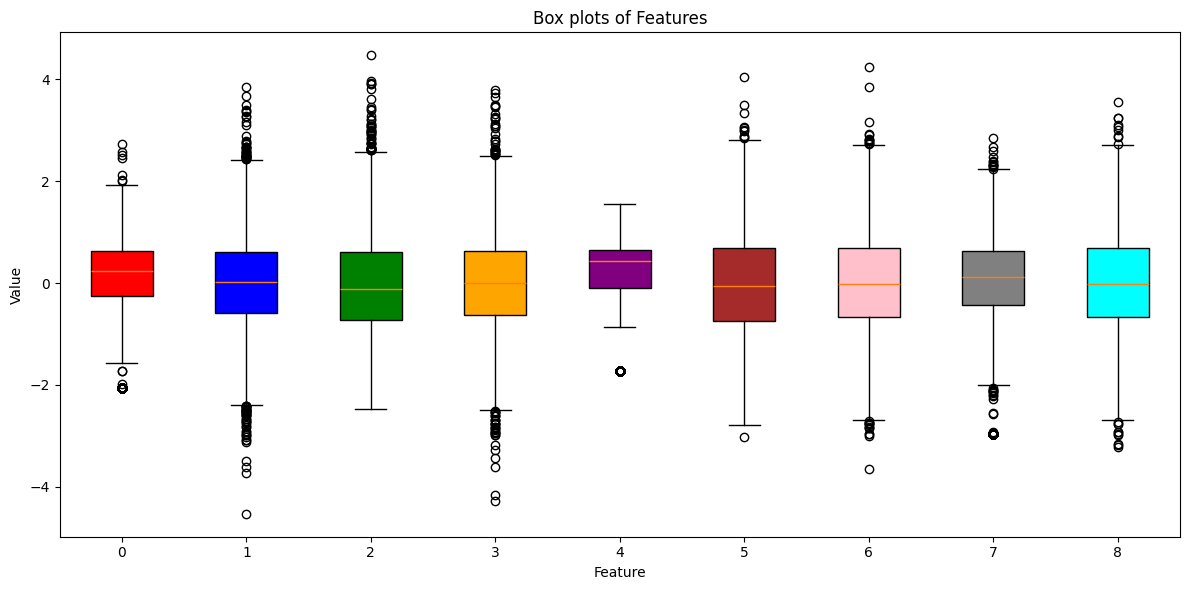

In [423]:
draw_boxplot(x_0)


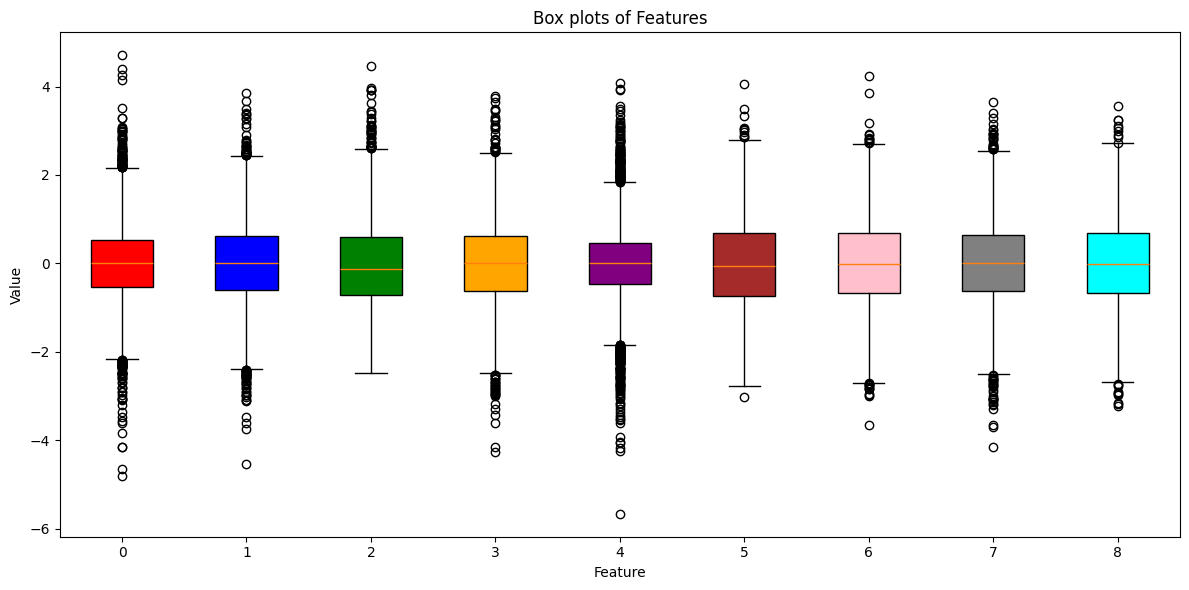

In [424]:
draw_boxplot(x_mean)

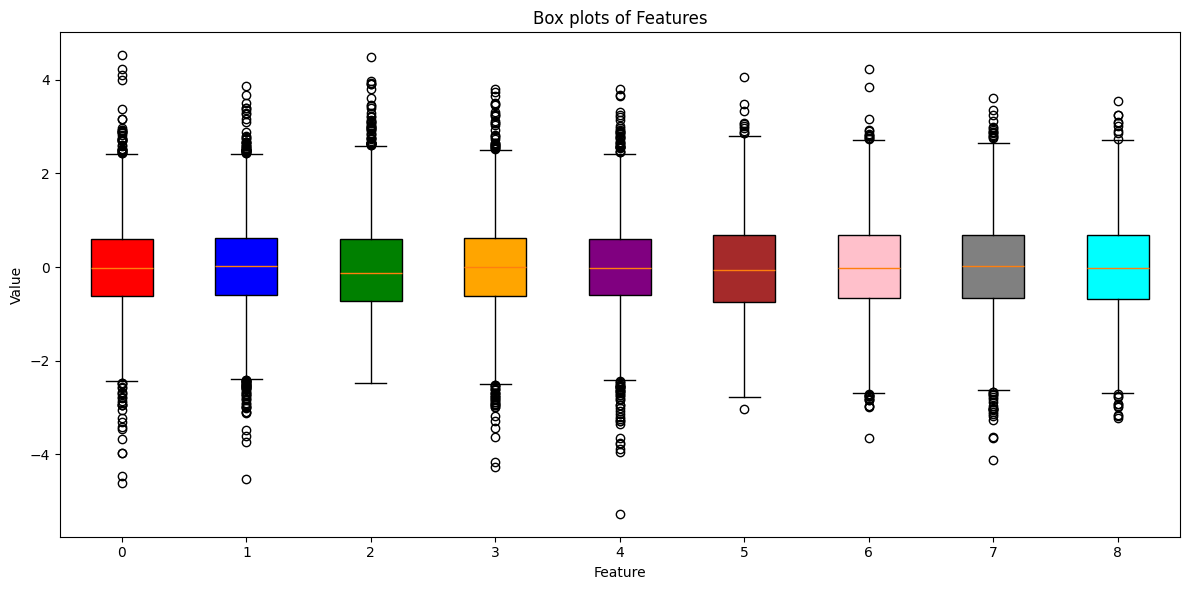

In [425]:
draw_boxplot(x_interpolate)